In [1]:
import pandas as pd

import numpy as np 
np.random.seed(42)

import re

import math 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.io as pio 
import plotly.express as px
%matplotlib inline

from tqdm.notebook import tqdm
tqdm.pandas()

from IPython.core.display import display, HTML 

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
from sklearn.model_selection import train_test_split  
from sklearn.ensemble import RandomForestRegressor 
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


from collections import Counter

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = None

from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import normaltest
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

from IPython.display import Image

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('Ento_data_270125.xlsx') 
df.head(5)

,Report timestamp,Reporter name,batch number,Expiration date,bsf stage (nursery or fattening),Larvae density,replicate # (box),box number (internal usage) \nnot mandatory,experiment purpose,start date (larvae t = 0 ),chickenfeed storage,Diet number \n(from the file with the diets n_ for nursery and f_ for fattening),Dry Matter S,"Total initial mass, kg",Energy yield MJkg,The day of max temperature,Max temperature,Diet values,Protein S,Carbs without NDF S,Fat S,NDF S,Ash S,Harvesting timestamp,"Cycle, days","100 Larvae biomass, gr","Average larval mass, mg",Number of larvae,Survival%,"total larval biomass, gr",DM L %,Fat L %,Protein L %,Protein L DM,Fat L DM,Ash L %,Fiber L %,"Frass, kg",DM F %,"Total N, % from DM","Total K, % from DM","Total P, % from DM",N-NH4,N-NO3,P,PH,EC
0,2023-05-10 09:59:59.995,yehuda,160423.0,2023-04-16,fattening,12500,1.0,31,diet test,2023-05-11 13:00:00.000,NaN,500,35.8,8.0,138.1164,5.0,41.8,0.0,21.4,51.2,10.6,11.7,5.1,2023-05-17 12:00:00,5.958333,12.90,129.0,10534.883721,84.279070,1359.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50
1,2023-05-10 09:59:59.995,yehuda,160423.0,2023-04-16,fattening,12500,1.0,32,diet test,2023-05-11 13:00:00.000,NaN,f_37,28.1,8.0,78.0337,4.0,44.2,1.0,16.9,33.4,8.5,26.3,9.3,2023-05-17 12:00:00,5.958333,6.15,61.5,10406.504065,83.252033,640.0,27.08,23.89,14.41,3.902228,6.469412,9.75,25.2,NaN,46.68,3.15,1.40,0.74,516.90,1.1960,269.4,6.8,5.67
2,2023-05-10 09:59:59.995,yehuda,160423.0,2023-04-16,fattening,12500,2.0,33,diet test,2023-05-11 12:59:59.995,NaN,500,38.0,8.0,146.6040,5.0,41.4,0.0,21.4,51.2,10.6,11.7,5.1,2023-05-17 12:00:00,5.958333,15.50,155.0,9916.129032,79.329032,1537.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50
3,2023-05-10 09:59:59.995,yehuda,160423.0,2023-04-16,fattening,12500,2.0,34,diet test,2023-05-11 12:59:59.995,NaN,f_37,28.1,8.0,78.0337,4.0,41.8,1.0,16.9,33.4,8.5,26.3,9.3,2023-05-17 12:00:00,5.958333,NaN,NaN,NaN,NaN,NaN,27.08,23.89,14.41,3.902228,6.469412,9.75,25.2,NaN,46.68,3.15,1.40,0.74,516.90,1.1960,269.4,6.8,5.67
4,2023-05-10 09:59:59.995,yehuda,160423.0,2023-04-16,fattening,12500,3.0,35,diet test,2023-05-11 14:00:00.000,NaN,500,38.0,8.0,146.6040,5.0,41.4,0.0,21.4,51.2,10.6,11.7,5.1,2023-05-17 13:00:00,5.958333,13.80,138.0,12413.043478,99.304348,1713.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50


In [4]:
 df = df.drop(columns=['Report timestamp', 'Reporter name', 'batch number ', 'Expiration date',
       'bsf stage (nursery or fattening)', 'Larvae density',
       'replicate # (box)', 'box number (internal usage) \nnot mandatory',
       'experiment purpose', 'start date (larvae t = 0 )',
       'chickenfeed storage','Total initial mass, kg', 'Harvesting timestamp ', 'Survival%', '100 Larvae biomass, gr',
       'Diet number \n(from the file with the diets n_ for nursery and f_ for fattening)'])
df.head(5)

,Dry Matter S,Energy yield MJkg,The day of max temperature,Max temperature,Diet values,Protein S,Carbs without NDF S,Fat S,NDF S,Ash S,"Cycle, days","Average larval mass, mg",Number of larvae,"total larval biomass, gr",DM L %,Fat L %,Protein L %,Protein L DM,Fat L DM,Ash L %,Fiber L %,"Frass, kg",DM F %,"Total N, % from DM","Total K, % from DM","Total P, % from DM",N-NH4,N-NO3,P,PH,EC
0,35.8,138.1164,5.0,41.8,0.0,21.4,51.2,10.6,11.7,5.1,5.958333,129.0,10534.883721,1359.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50
1,28.1,78.0337,4.0,44.2,1.0,16.9,33.4,8.5,26.3,9.3,5.958333,61.5,10406.504065,640.0,27.08,23.89,14.41,3.902228,6.469412,9.75,25.2,NaN,46.68,3.15,1.40,0.74,516.90,1.1960,269.4,6.8,5.67
2,38.0,146.6040,5.0,41.4,0.0,21.4,51.2,10.6,11.7,5.1,5.958333,155.0,9916.129032,1537.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50
3,28.1,78.0337,4.0,41.8,1.0,16.9,33.4,8.5,26.3,9.3,5.958333,NaN,NaN,NaN,27.08,23.89,14.41,3.902228,6.469412,9.75,25.2,NaN,46.68,3.15,1.40,0.74,516.90,1.1960,269.4,6.8,5.67
4,38.0,146.6040,5.0,41.4,0.0,21.4,51.2,10.6,11.7,5.1,5.958333,138.0,12413.043478,1713.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50


In [5]:
cols_null_percent = df.isnull().mean() * 100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
print ('% of gaps:')
display(cols_with_null)

% of gaps:


Max temperature               69.841270
The day of max temperature    69.523810
Diet values                   47.936508
P                             29.841270
EC                            14.285714
Fiber L %                     13.968254
DM L %                        12.698413
Ash L %                       12.698413
Fat L %                       12.698413
Protein L %                   12.698413
DM F %                        10.476190
Total N, % from DM            10.476190
Total K, % from DM            10.476190
Total P, % from DM            10.476190
N-NH4                         10.476190
N-NO3                         10.476190
PH                            10.476190
Frass, kg                      5.079365
 total larval  biomass, gr     2.222222
Number of larvae               2.222222
Carbs without NDF S            1.269841
Ash S                          1.269841
NDF S                          1.269841
Protein S                      1.269841
Fat S                          1.269841


In [6]:
df = df.drop(columns=['The day of max temperature', 'Max temperature', 'Diet values'])
df.head(5)

,Dry Matter S,Energy yield MJkg,Protein S,Carbs without NDF S,Fat S,NDF S,Ash S,"Cycle, days","Average larval mass, mg",Number of larvae,"total larval biomass, gr",DM L %,Fat L %,Protein L %,Protein L DM,Fat L DM,Ash L %,Fiber L %,"Frass, kg",DM F %,"Total N, % from DM","Total K, % from DM","Total P, % from DM",N-NH4,N-NO3,P,PH,EC
0,35.8,138.1164,21.4,51.2,10.6,11.7,5.1,5.958333,129.0,10534.883721,1359.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50
1,28.1,78.0337,16.9,33.4,8.5,26.3,9.3,5.958333,61.5,10406.504065,640.0,27.08,23.89,14.41,3.902228,6.469412,9.75,25.2,NaN,46.68,3.15,1.40,0.74,516.90,1.1960,269.4,6.8,5.67
2,38.0,146.6040,21.4,51.2,10.6,11.7,5.1,5.958333,155.0,9916.129032,1537.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50
3,28.1,78.0337,16.9,33.4,8.5,26.3,9.3,5.958333,NaN,NaN,NaN,27.08,23.89,14.41,3.902228,6.469412,9.75,25.2,NaN,46.68,3.15,1.40,0.74,516.90,1.1960,269.4,6.8,5.67
4,38.0,146.6040,21.4,51.2,10.6,11.7,5.1,5.958333,138.0,12413.043478,1713.0,33.71,29.75,32.10,10.820910,10.028725,8.60,33.2,NaN,70.45,2.37,1.02,0.84,465.95,0.3657,181.6,6.8,4.50


In [7]:
df.columns

Index(['Dry Matter S', 'Energy yield MJkg', 'Protein S', 'Carbs without NDF S',
       'Fat S', 'NDF S', 'Ash S', 'Cycle, days', 'Average larval  mass, mg',
       'Number of larvae', ' total larval  biomass, gr', 'DM L %', 'Fat L %',
       'Protein L %', 'Protein L DM', 'Fat L DM', 'Ash L %', 'Fiber L %',
       'Frass, kg', 'DM F %', 'Total N, % from DM', 'Total K, % from DM',
       'Total P, % from DM', 'N-NH4', 'N-NO3', 'P', 'PH', 'EC'],
      dtype='object')

In [8]:
fill_df = df[['Dry Matter S', 'Energy yield MJkg', 'Protein S', 'Carbs without NDF S','Fat S', 'NDF S', 'Ash S', 'Cycle, days', 'Average larval  mass, mg',
       'Number of larvae', ' total larval  biomass, gr','DM L %', 'Fat L %',
       'Protein L %', 'Protein L DM', 'Fat L DM', 'Ash L %', 'Fiber L %',
       'Frass, kg', 'DM F %']].copy()
values = {
    'Dry Matter S': (df['Dry Matter S'].median()),
    'DM L %': (df['DM L %'].median()),
    'Fat L %': (df['Fat L %'].median()),
    'Protein L %': (df['Protein L %'].median()),
    'Protein S': (df['Protein S'].median()),
    'Carbs without NDF S': (df['Carbs without NDF S'].median()),
    'Fat S': (df['Fat S'].mean()),
    'NDF S': (df['NDF S'].median()),
    'Ash S': (df['Ash S'].median())
}

fill_df = fill_df.fillna(values)

fill_df = fill_df.dropna(subset=['Average larval  mass, mg'])
fill_df = fill_df.dropna(subset=['Number of larvae'])
fill_df = fill_df.dropna(subset=[' total larval  biomass, gr'])

fill_df.isnull().mean()

Dry Matter S                  0.000000
Energy yield MJkg             0.000000
Protein S                     0.000000
Carbs without NDF S           0.000000
Fat S                         0.000000
NDF S                         0.000000
Ash S                         0.000000
Cycle, days                   0.000000
Average larval  mass, mg      0.000000
Number of larvae              0.000000
 total larval  biomass, gr    0.000000
DM L %                        0.000000
Fat L %                       0.000000
Protein L %                   0.000000
Protein L DM                  0.000000
Fat L DM                      0.000000
Ash L %                       0.116883
Fiber L %                     0.129870
Frass, kg                     0.029221
DM F %                        0.094156
dtype: float64

In [9]:
mask = fill_df.duplicated(subset = fill_df.columns)
data_duplicates = fill_df[mask]
print(f'Number of duplicates found and deleted: {data_duplicates.shape[0]}')

fill_df = fill_df.drop_duplicates(subset = fill_df.columns)

Number of duplicates found and deleted: 0


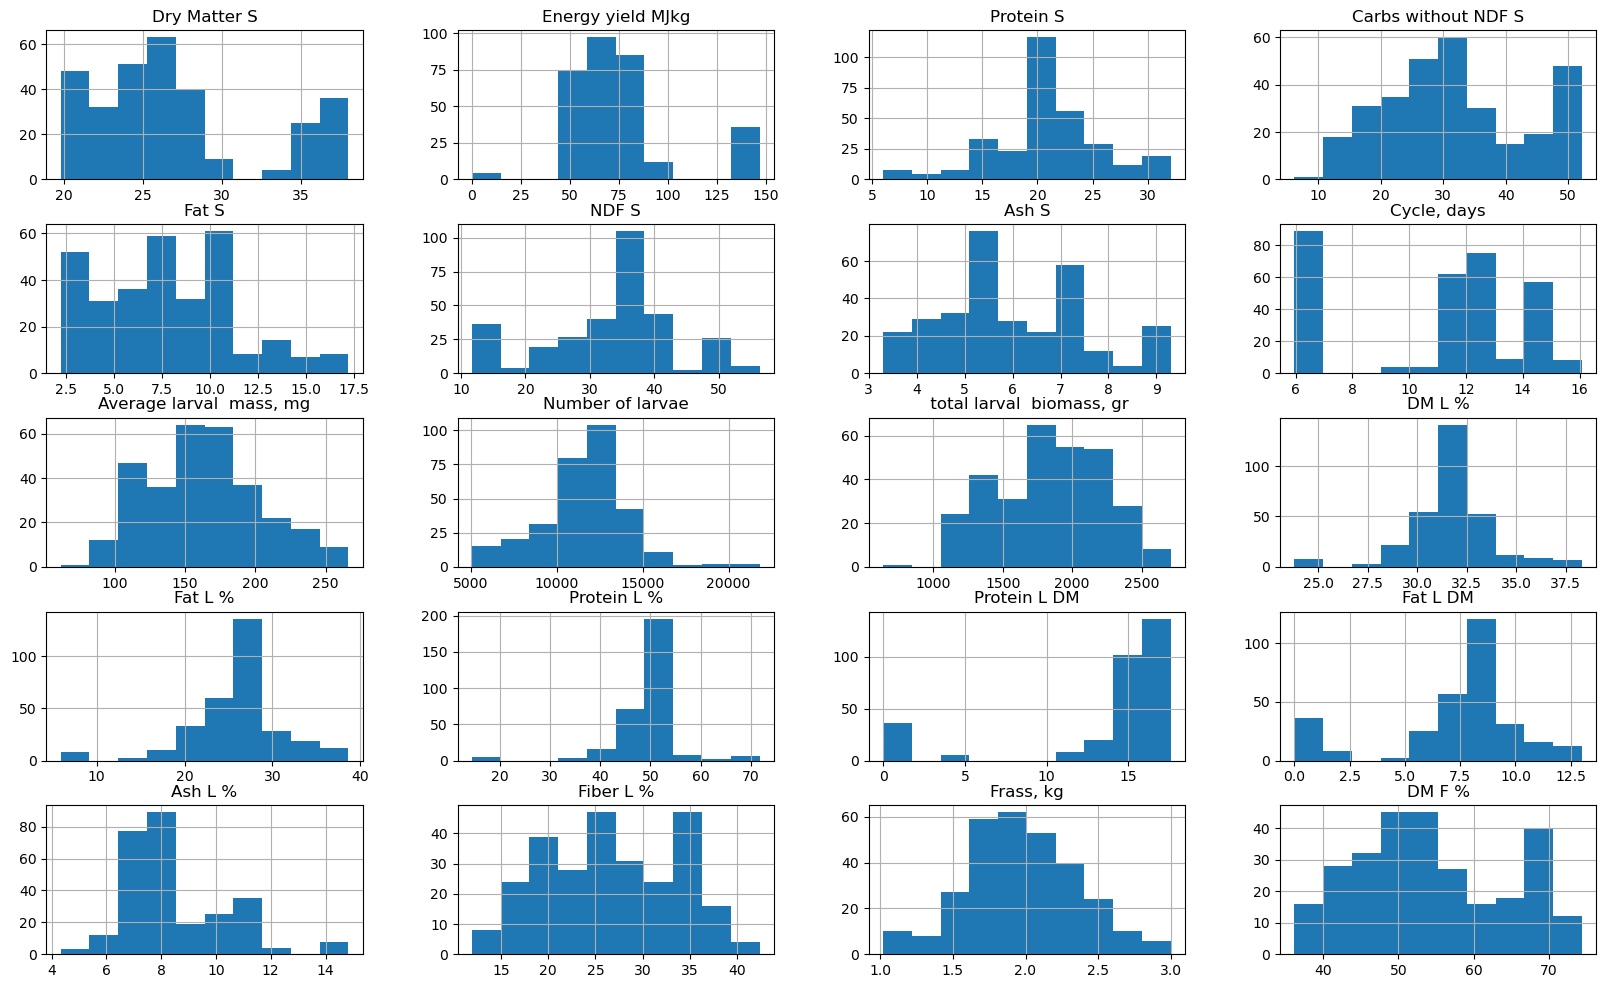

In [10]:
fill_df.hist(figsize=(20, 12))
pass

(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(308, 20)
(303, 20)
(267, 20)
(267, 20)
(267, 20)
(263, 20)
(259, 20)
(255, 20)


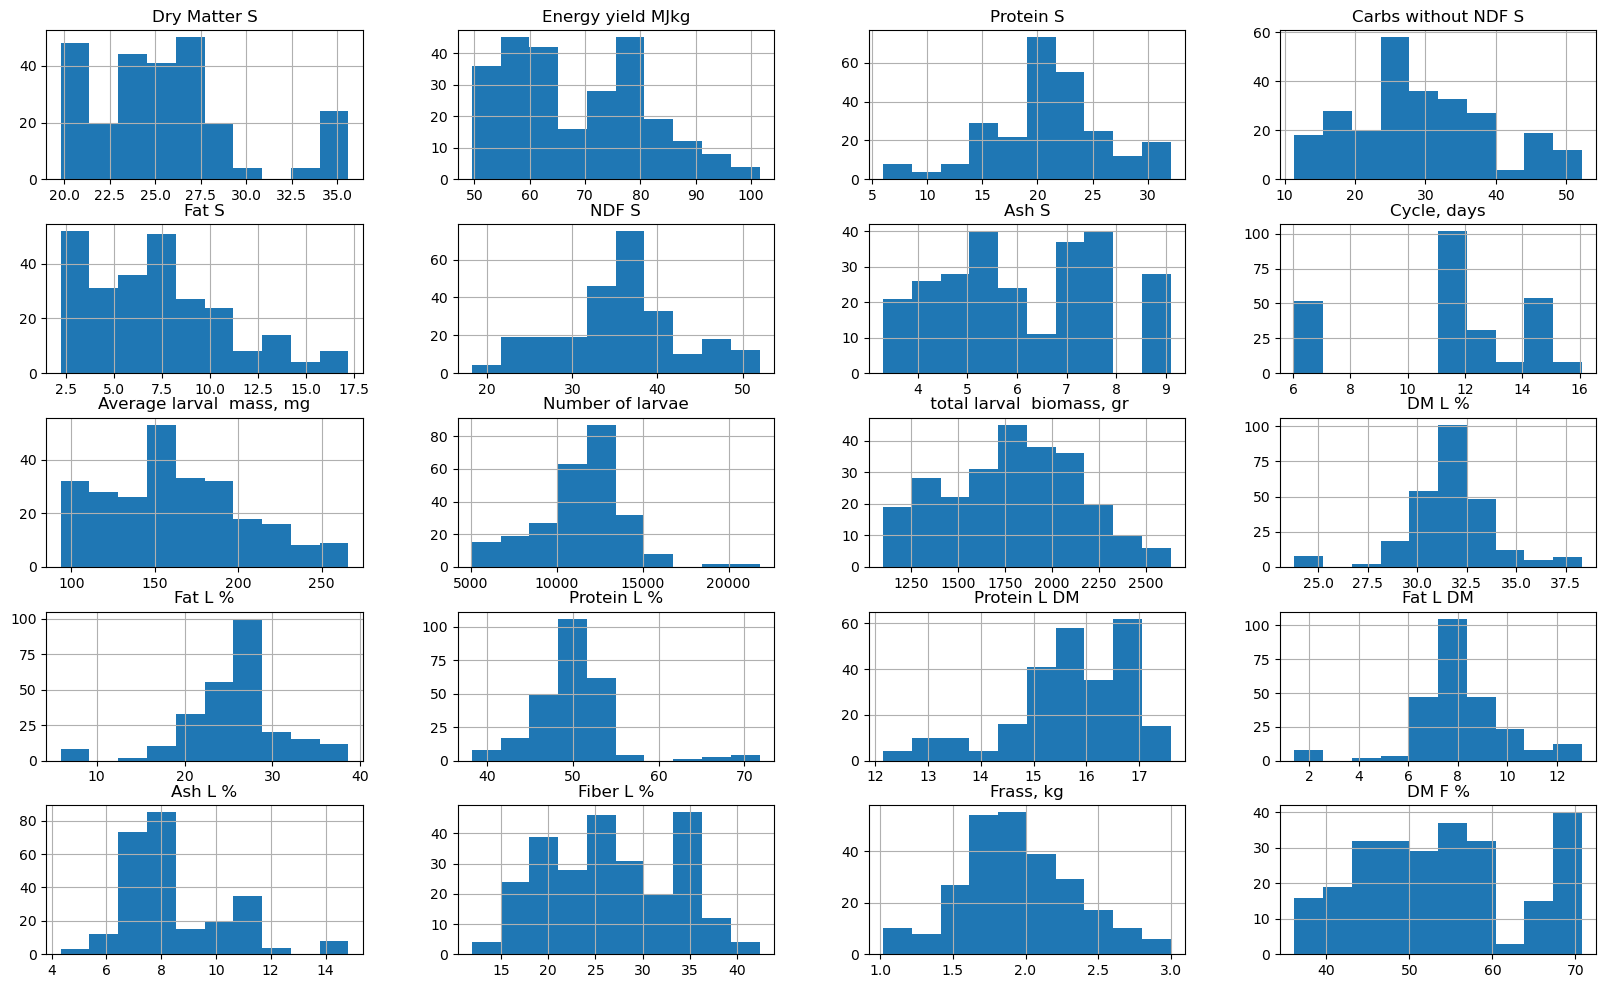

In [11]:
def outliers_iqr_mod(data, feature, log_scale=False, left=1.5, right=1.5):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    #outliers = data[(x<lower_bound) | (x > upper_bound)]
    cleaned = data[(x>lower_bound) & (x < upper_bound)]
    return  cleaned

cleaned_data = fill_df.copy()
for feature in fill_df.columns:
    cleaned_data = outliers_iqr_mod(cleaned_data, feature, False, 5, 5)
    print(cleaned_data.shape)

cleaned_data.hist(figsize=(20, 12))
pass

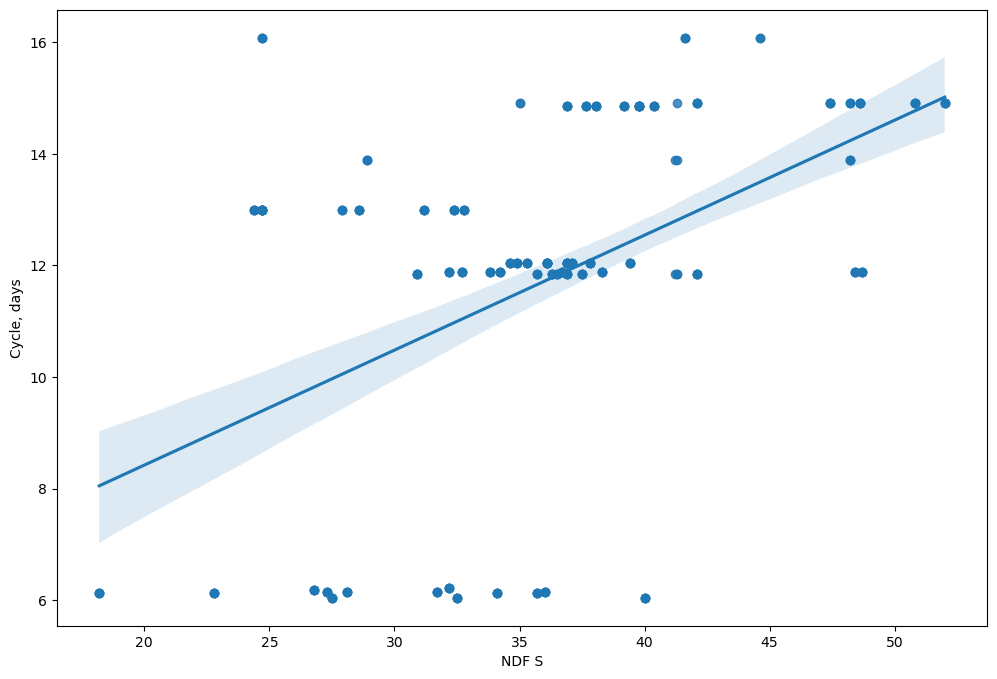

In [12]:
fig = plt.figure(figsize = (12, 8));
regplot = sns.regplot(data = cleaned_data, 
                              x = 'NDF S', 
                              y = 'Cycle, days', 
                             );
plt.show()

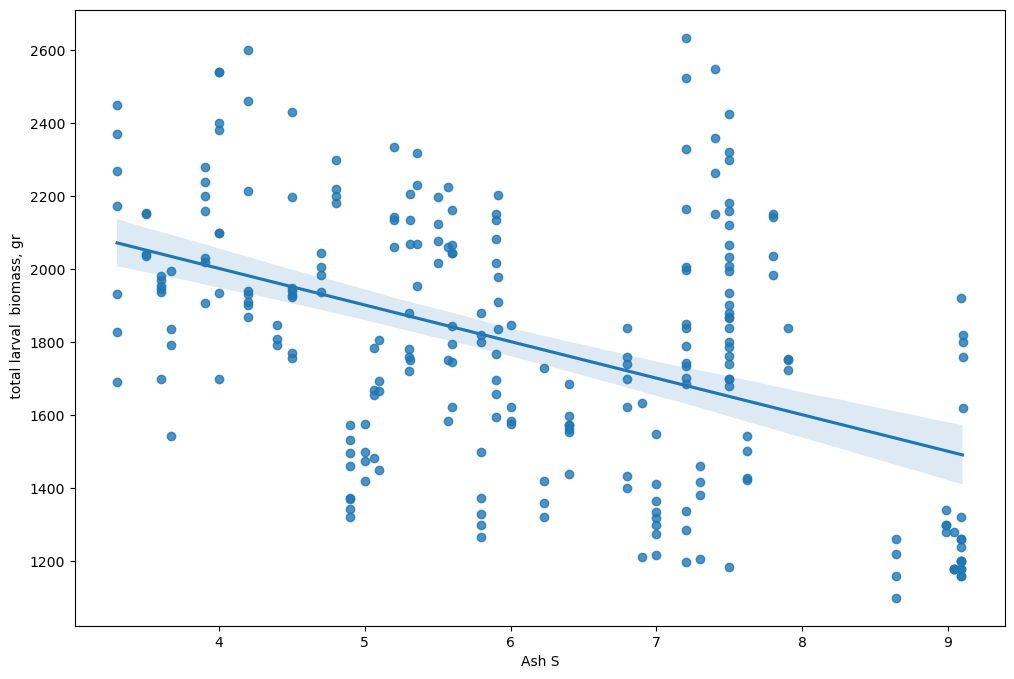

In [13]:
fig = plt.figure(figsize = (12, 8));
regplot = sns.regplot(data = cleaned_data, 
                              x = 'Ash S', 
                              y = ' total larval  biomass, gr', 
                             );
plt.show()

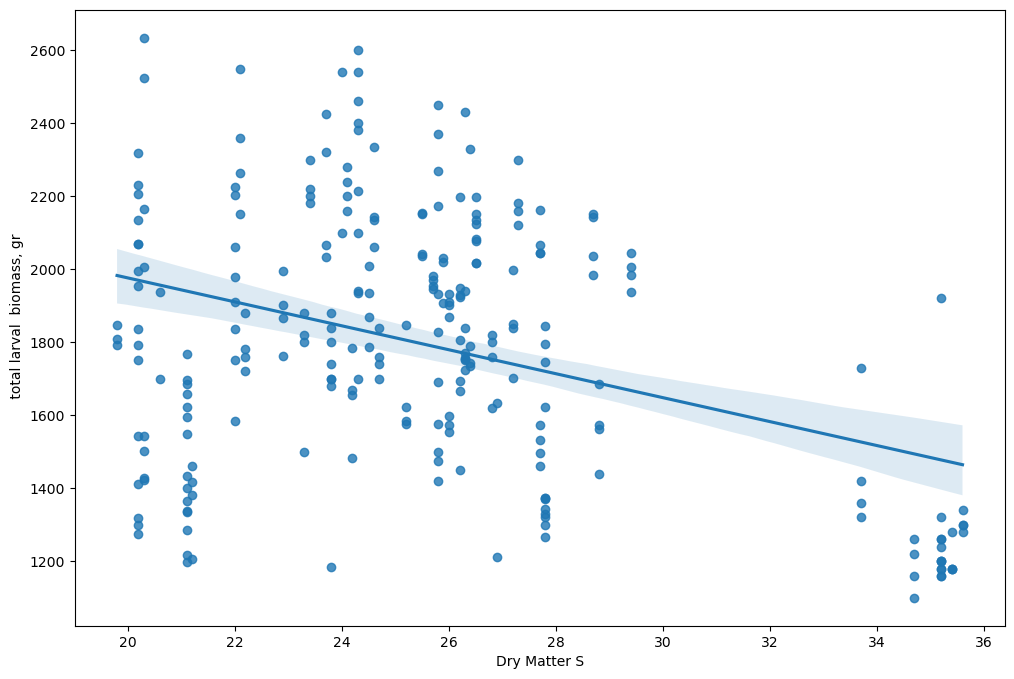

In [14]:
fig = plt.figure(figsize = (12, 8));
regplot = sns.regplot(data = cleaned_data, 
                              x = 'Dry Matter S', 
                              y = ' total larval  biomass, gr', 
                             );
plt.show()

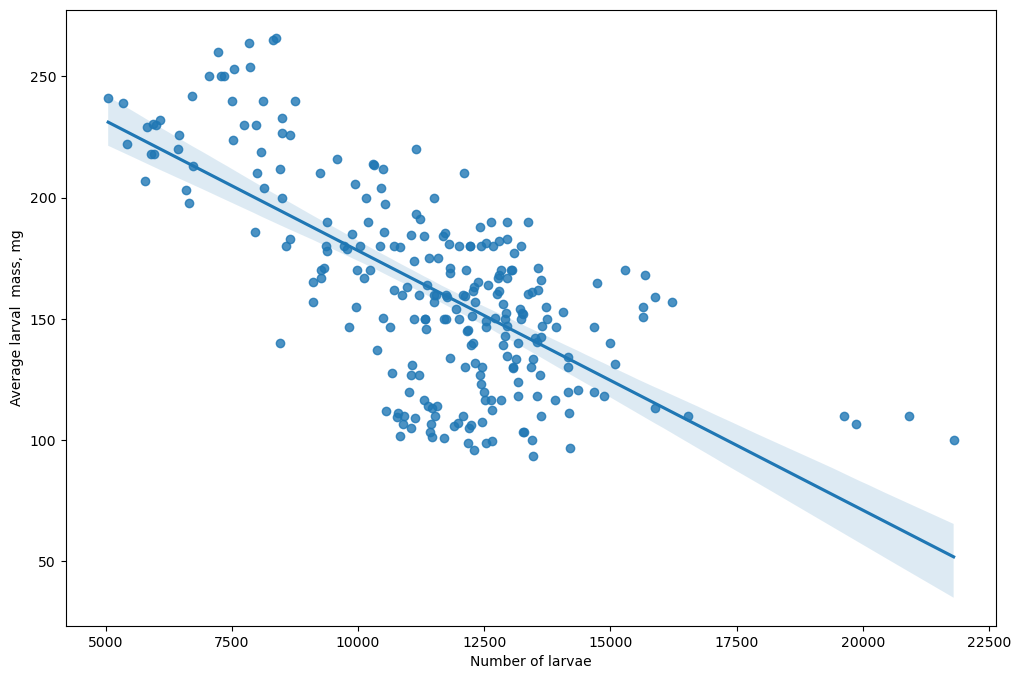

In [15]:
fig = plt.figure(figsize = (12, 8));
regplot = sns.regplot(data = cleaned_data, 
                              x = 'Number of larvae', 
                              y = 'Average larval  mass, mg', 
                             );
plt.show()

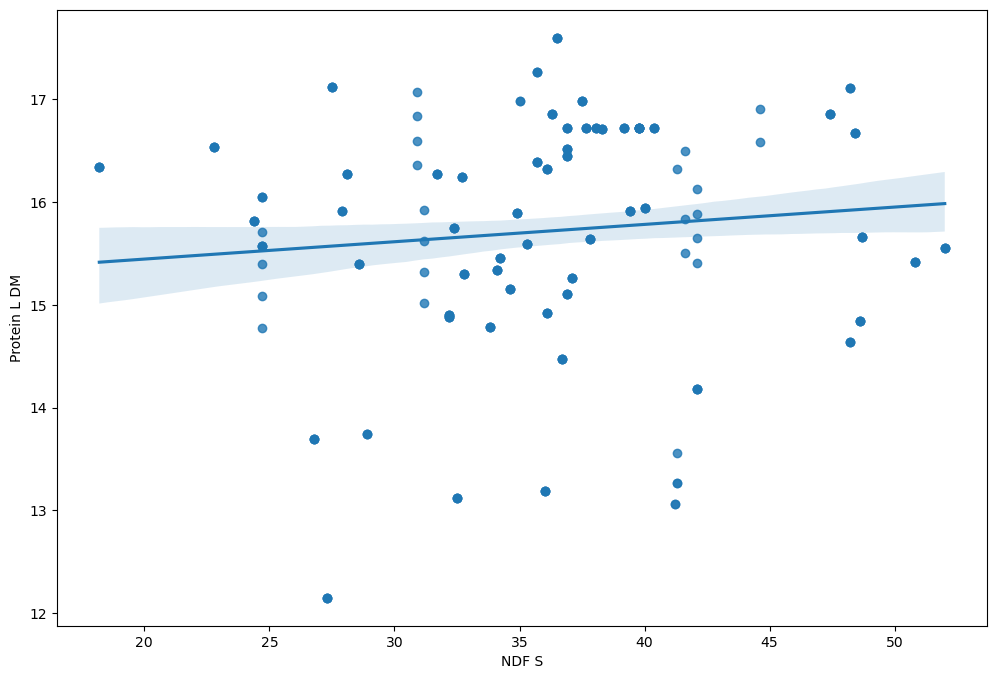

In [16]:
fig = plt.figure(figsize = (12, 8));
regplot = sns.regplot(data = cleaned_data, 
                              x = 'NDF S', 
                              y = 'Protein L DM', 
                             );
plt.show()

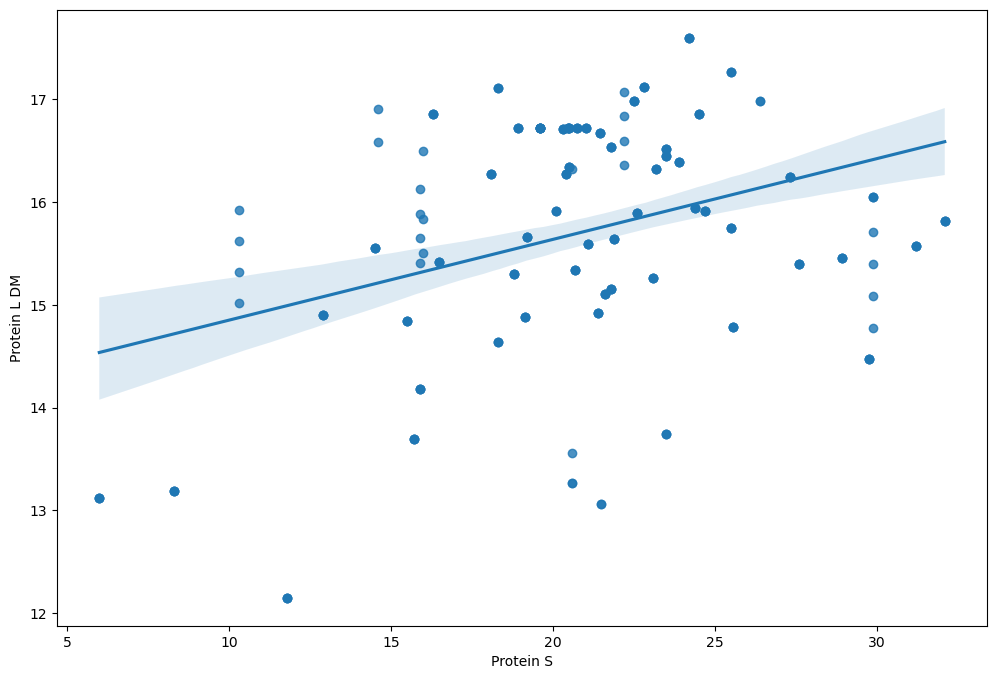

In [17]:
fig = plt.figure(figsize = (12, 8));
regplot = sns.regplot(data = cleaned_data, 
                              x = 'Protein S', 
                              y = 'Protein L DM', 
                             );
plt.show()

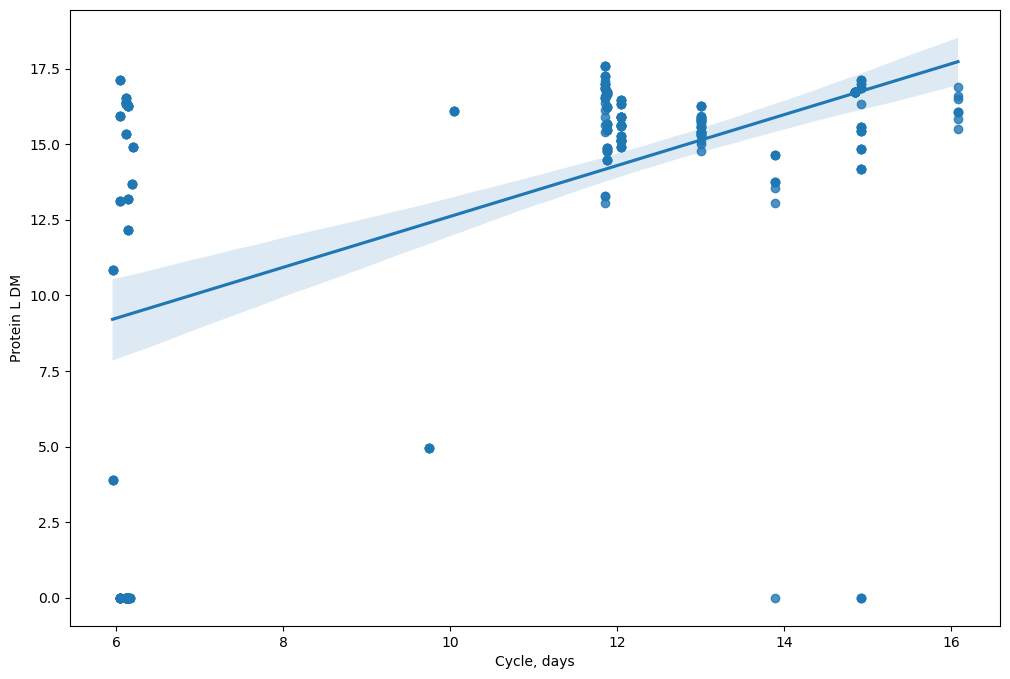

In [18]:
fig = plt.figure(figsize = (12, 8));
regplot = sns.regplot(data = df, 
                              x = 'Cycle, days', 
                              y = 'Protein L DM', 
                             );
plt.show()

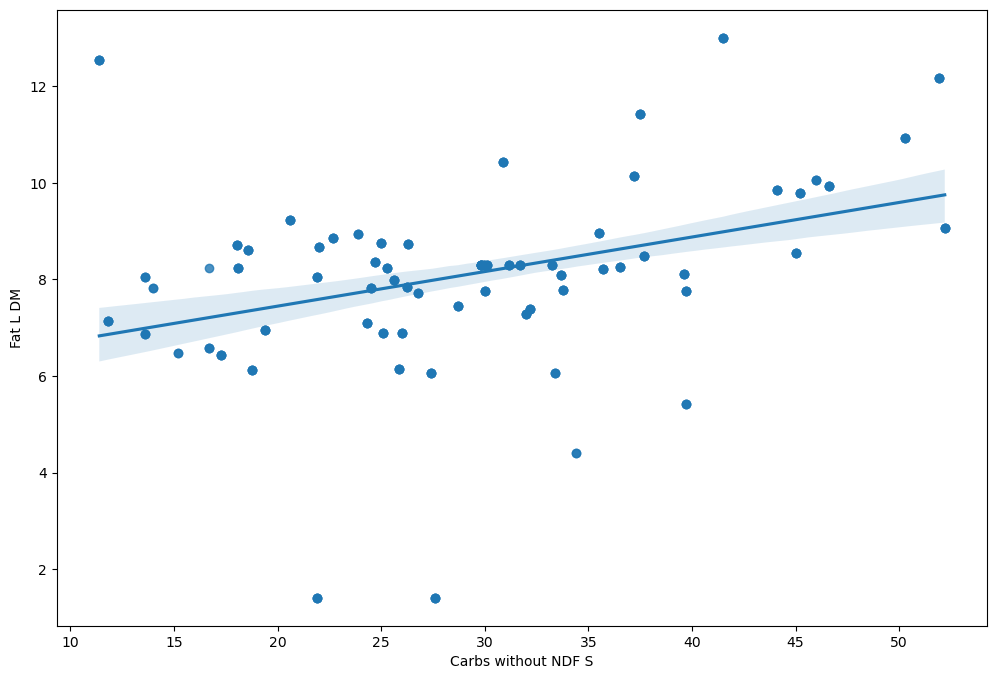

In [19]:
fig = plt.figure(figsize = (12, 8));
regplot = sns.regplot(data = cleaned_data, 
                              x = 'Carbs without NDF S', 
                              y = 'Fat L DM', 
                             );
plt.show()

In [20]:
cleaned_data = cleaned_data [['Dry Matter S', 'Energy yield MJkg', 'Protein S', 'Carbs without NDF S',
       'Fat S', 'NDF S', 'Ash S', 'Protein L DM',
       'Fat L DM']]

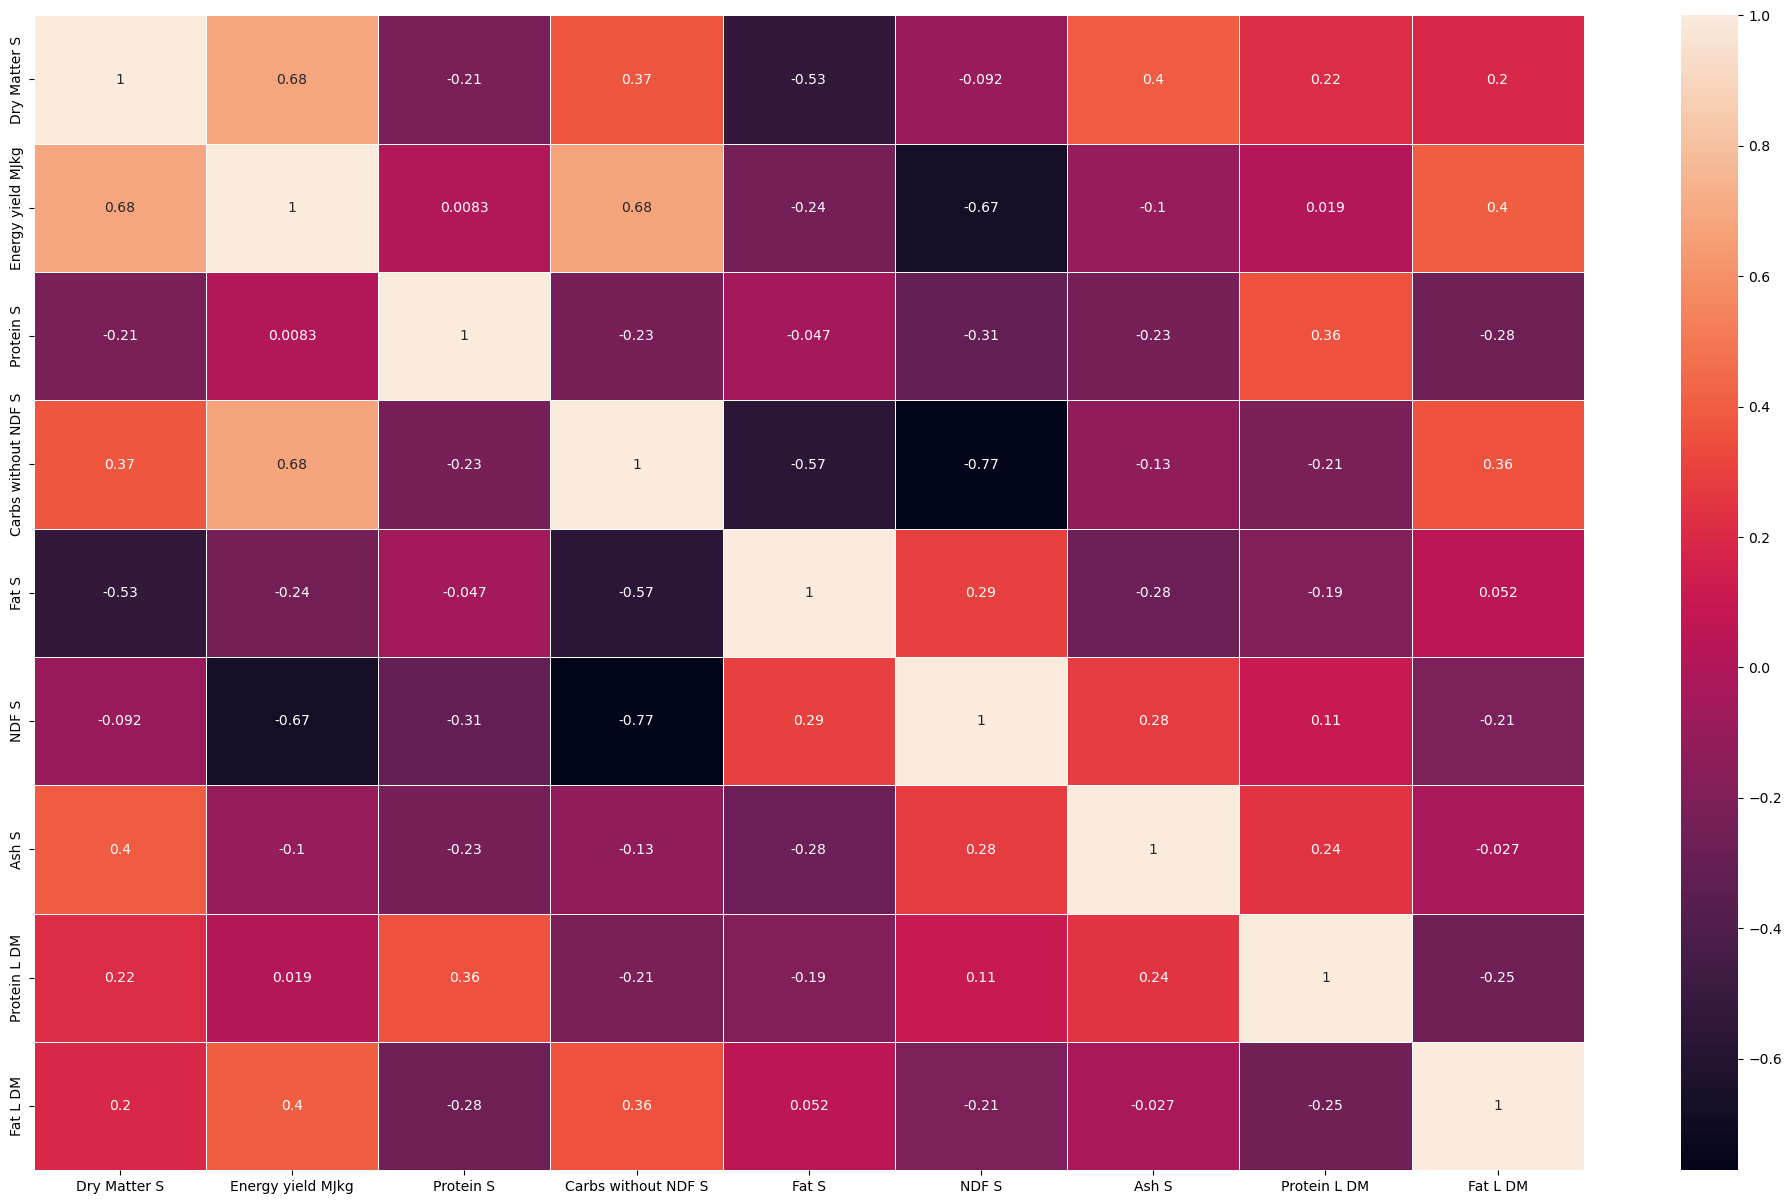

In [21]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(cleaned_data.corr(), annot=True, linewidths=.5, ax=ax)
pass

# ML Algorythms

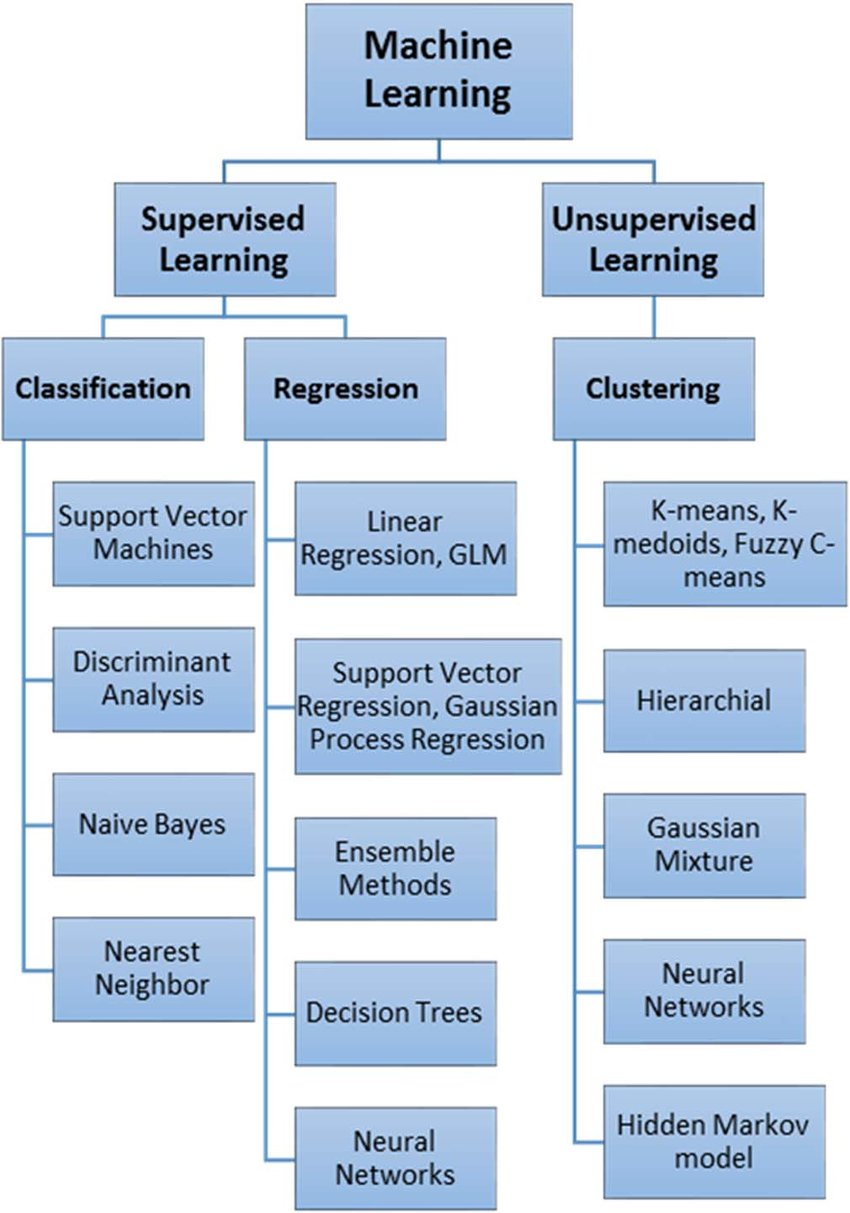

# Decision tree

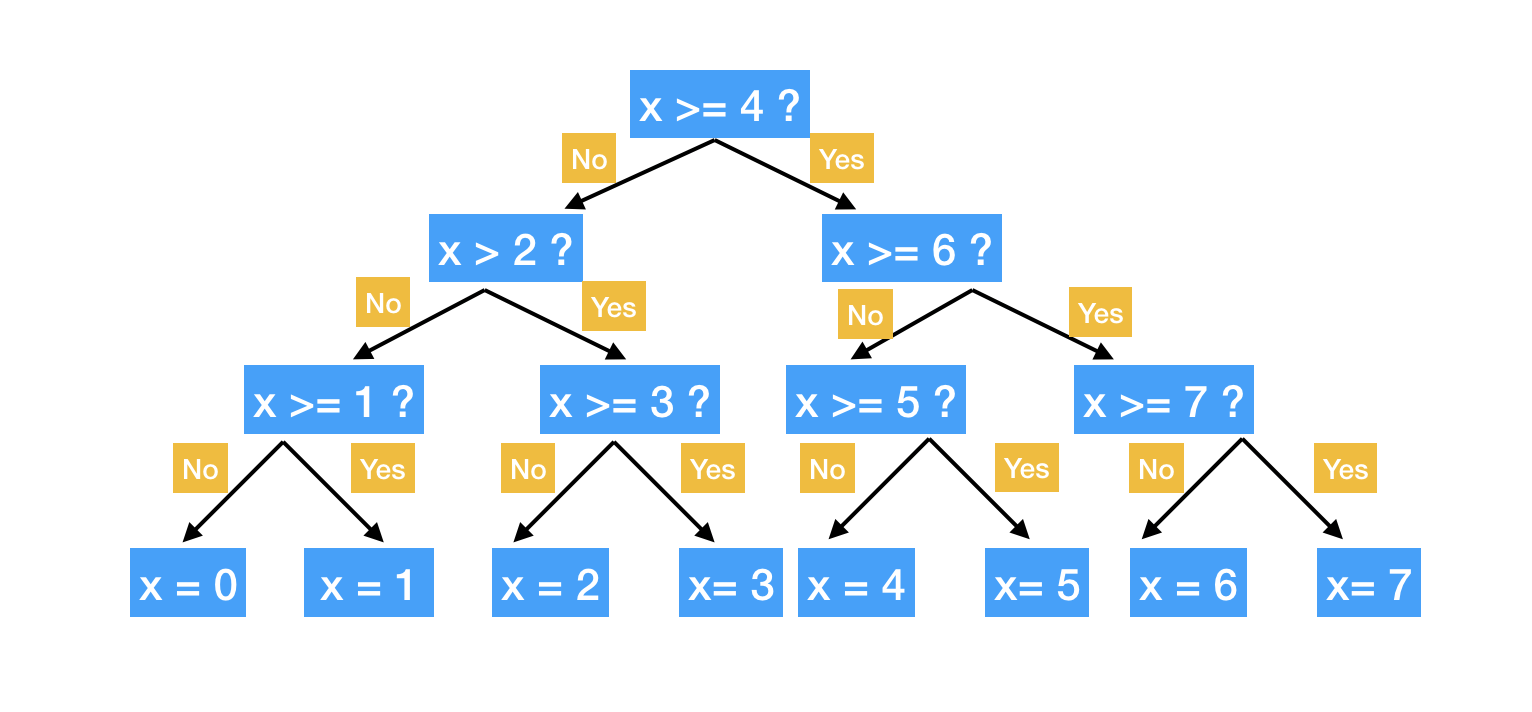

# Random Forest

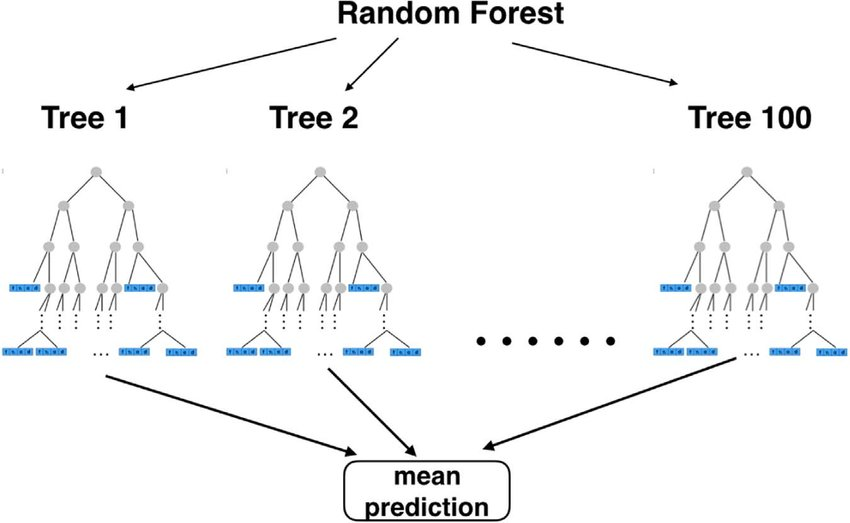

# Fat model 

In [22]:
X = cleaned_data.drop(['Fat L DM', 'Protein L DM'], axis = 1)  
y = cleaned_data['Fat L DM'] 

In [23]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)

In [24]:
model = RandomForestRegressor(n_estimators=100, max_depth=15, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('MAPE:', metrics.mean_absolute_percentage_error(y_train_predict, y_train)*100, '%')
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred)*100, '%')

MAPE: 3.690532115570807 %
MAPE: 3.025360602270823 %


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [25]:
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials

In [26]:
space={'n_estimators': hp.quniform('n_estimators', 10, 150, 5),
       'max_depth' : hp.quniform('max_depth', 1, 20, 1),
       'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
       'criterion': hp.choice ('criterion', ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'])
      }

In [27]:
random_state = 42
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
  
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
              'min_samples_leaf': int(params['min_samples_leaf']),
              'criterion': params ['criterion']
              }

  
    
    model = ensemble.RandomForestRegressor(**params, random_state=random_state)

   
    model.fit(X, y)
    score = metrics.mean_absolute_percentage_error(y, model.predict(X))
    
    
    return -score

In [28]:
%%time

trials = Trials() 

best=fmin(hyperopt_rf, 
          space=space, 
          algo=tpe.suggest, 
          max_evals=20, 
          trials=trials, 
          rstate=np.random.RandomState(random_state)
         )
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████████████████████████████████████████| 20/20 [00:03<00:00,  5.76trial/s, best loss: -0.25757853765093836]
Наилучшие значения гиперпараметров {'criterion': 1, 'max_depth': 2.0, 'min_samples_leaf': 8.0, 'n_estimators': 75.0}
Wall time: 3.48 s


In [29]:
fat_model = RandomForestRegressor(n_estimators=100, max_depth=15, verbose = 0, random_state=RANDOM_SEED)

fat_model.fit(X_train, y_train)

y_pred = fat_model.predict(X_test)
y_train_predict = fat_model.predict(X_train)

print('MAPE:', metrics.mean_absolute_percentage_error(y_train_predict, y_train)*100, '%')
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred)*100, '%')

MAPE: 3.6905321155708064 %
MAPE: 3.0253606022708235 %


<AxesSubplot:>

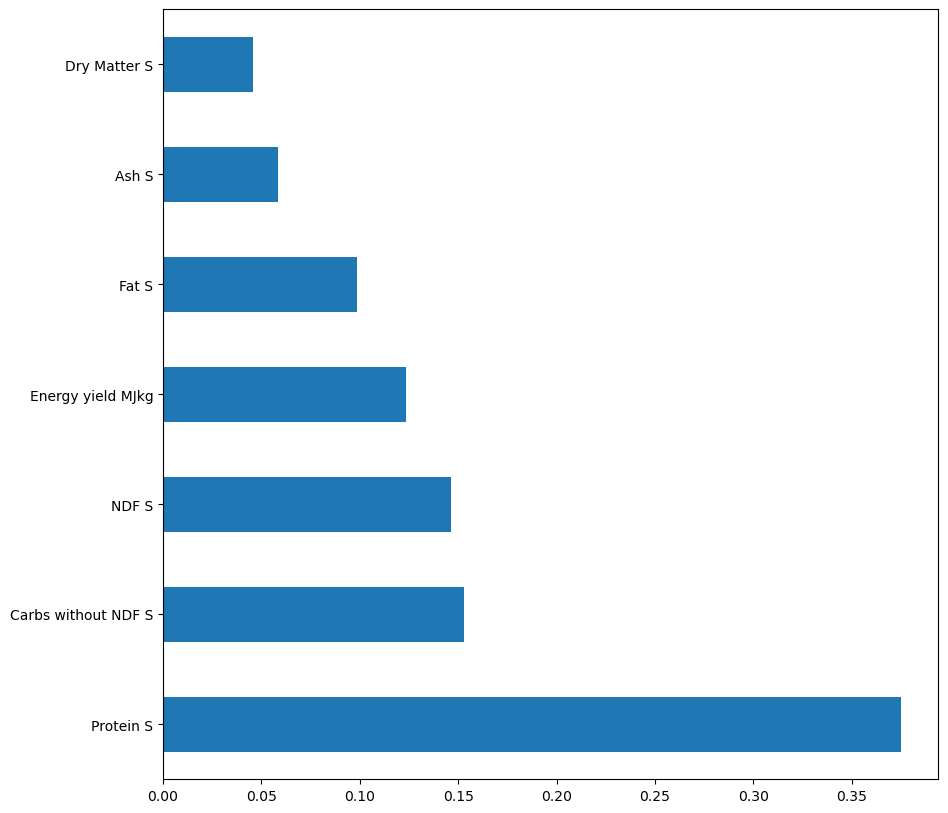

In [30]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(fat_model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [31]:
import joblib

joblib.dump(fat_model, 'fat.joblib')

['fat.joblib']

# Protein model 


In [32]:
X = cleaned_data.drop(['Fat L DM', 'Protein L DM'], axis = 1)  
y = cleaned_data['Protein L DM'] 

In [33]:
RANDOM_SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=RANDOM_SEED)

In [38]:
# model = RandomForestRegressor(n_estimators=100, max_depth=15, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)

print('MAPE:', metrics.mean_absolute_percentage_error(y_train_predict, y_train)*100, '%')
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred)*100, '%')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


MAPE: 0.7568076575105053 %
MAPE: 1.7647889716518241 %


[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [34]:
%%time

trials = Trials() 

best=fmin(hyperopt_rf, 
          space=space, 
          algo=tpe.suggest, 
          max_evals=20, 
          trials=trials, 
          rstate=np.random.RandomState(random_state)
         )
print("Наилучшие значения гиперпараметров {}".format(best))

100%|██████████████████████████████████████████████| 20/20 [00:03<00:00,  6.09trial/s, best loss: -0.25757853765093836]
Наилучшие значения гиперпараметров {'criterion': 1, 'max_depth': 2.0, 'min_samples_leaf': 8.0, 'n_estimators': 75.0}
Wall time: 3.3 s


In [35]:
proteein_model = RandomForestRegressor(n_estimators=100, max_depth=15, verbose = 0, random_state=RANDOM_SEED)

proteein_model.fit(X_train, y_train)

y_pred = proteein_model.predict(X_test)
y_train_predict = proteein_model.predict(X_train)

print('MAPE:', metrics.mean_absolute_percentage_error(y_train_predict, y_train)*100, '%')
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred)*100, '%')

MAPE: 0.7568076575105045 %
MAPE: 1.7647889716518244 %


<AxesSubplot:>

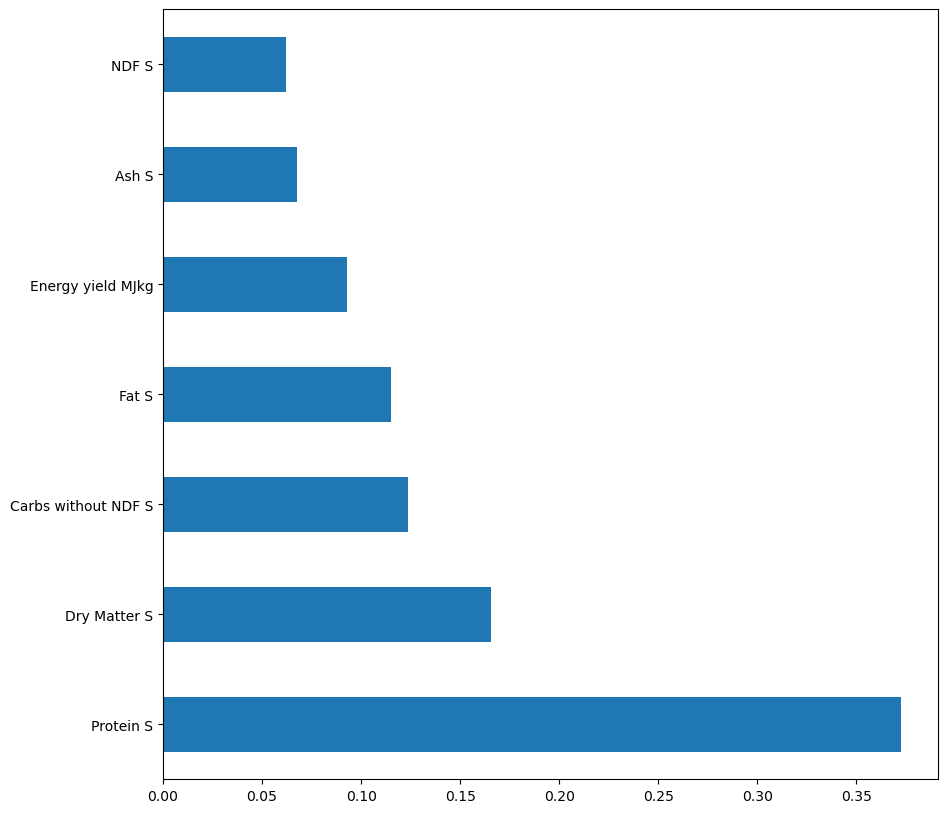

In [36]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(proteein_model.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')

In [37]:
joblib.dump(proteein_model, 'protein.joblib')

['protein.joblib']